In [7]:
import pandas as pd
import os
import talib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import sys
path_root = "D:/Documentos/Erik/TDR/TDR-Forex/"
sys.path.append(path_root)
from utils.data import load_data
from utils.indicators import get_EMAs

output_path = os.path.join(path_root, f'Output/Forex/charts/TDR')
os.makedirs(output_path, exist_ok=True)

In [8]:
symbol = "EURUSD"; timeframe = "H1"
data = load_data(symbol, timeframe, path_root)
data = data[data.time.dt.year >= 2025].reset_index(drop=True)
data.head()

,time,open,high,low,close,tick_volume
0,2025-01-02 00:00:00,1.03515,1.03571,1.03491,1.03553,876
1,2025-01-02 01:00:00,1.03553,1.03565,1.03462,1.03507,929
2,2025-01-02 02:00:00,1.03507,1.03563,1.03473,1.03519,1110
3,2025-01-02 03:00:00,1.03519,1.03606,1.03444,1.03577,1641
4,2025-01-02 04:00:00,1.03577,1.03711,1.03576,1.03708,921


## Mitjanes SMA i EMA

La SMA dóna el mateix pes a tots els preus del període, mentre que la EMA dóna més importància als preus més recents, així respon més ràpid als canvis del mercat.

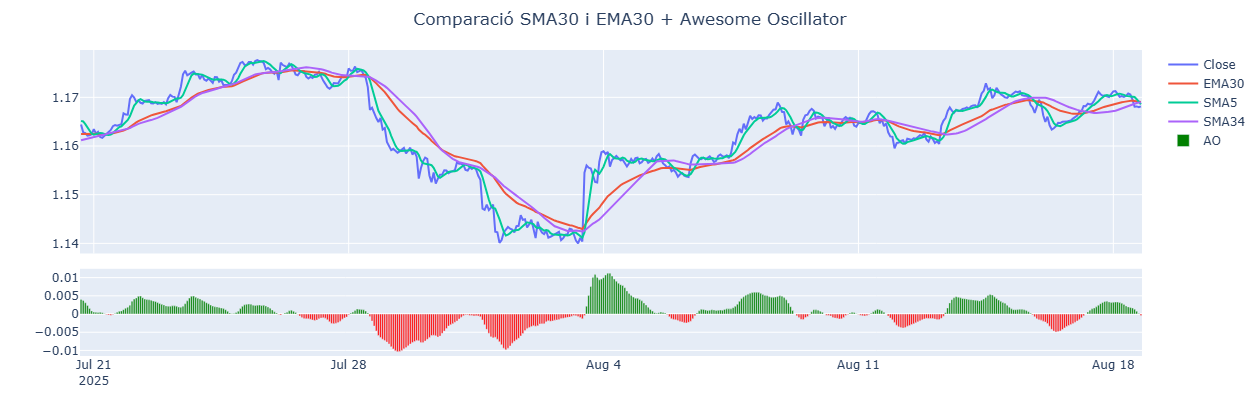

In [13]:
data['median_price'] = (data['high'] + data['low']) / 2
data['SMA34'] = data['median_price'].rolling(34).mean()
data['ema34'] = data.close.ewm(span=34).mean()
data['SMA5'] = data['median_price'].rolling(5).mean()
data['AO'] = data['SMA5'] - data['SMA34']

df = data.tail(500).copy()
df['color'] = df['AO'].apply(lambda x: "green" if x >= 0 else "red")
# Creem la figura amb 2 files i 1 columna
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, row_heights=[0.7, 0.3],vertical_spacing=0.05)

fig.add_trace(go.Scatter(x=df['time'], y=df['close'], mode='lines', name='Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=df['time'], y=df['ema34'], mode='lines', name='EMA30'), row=1, col=1)
fig.add_trace(go.Scatter(x=df['time'], y=df['SMA5'], mode='lines', name='SMA5'), row=1, col=1)
fig.add_trace(go.Scatter(x=df['time'], y=df['SMA34'], mode='lines', name='SMA34'), row=1, col=1)
fig.add_trace(go.Bar(x=df['time'], y=df['AO'], name="AO", marker_color=df['color']), row=2, col=1)
# Configuració eix horitzontal
fig.update_xaxes(rangebreaks=[dict(bounds=["sat", "mon"])], row=1, col=1)
fig.update_xaxes(rangebreaks=[dict(bounds=["sat", "mon"])], row=2, col=1)
fig.update_layout(
    title_x=0.5,
    title_text="Comparació SMA30 i EMA30 + Awesome Oscillator",
    margin=dict(t=50, b=20),
    showlegend=True,
    height=400
)

# Exportar i mostrar
filename = os.path.join(output_path, "analisi_tecnica_001")
fig.write_html(f'{filename}.html')
fig.show()

In [11]:
symbol = "EURUSD"; timeframe = "H1"
data = load_data(symbol, timeframe, path_root)
display(data.head())
data = data[data.time.dt.year >= 2025].reset_index(drop=True)
data = get_EMAs(data)
data["diff_emas30"] = (data.ema30-data.ema200).ewm(span=30, adjust=False).mean()
data["diff_emas200"] = (data.ema30-data.ema200).ewm(span=200, adjust=False).mean()
data["rsi"] = talib.RSI(data["close"], timeperiod=30)
data["std"] = data["close"].ewm(span=200, adjust=False).std()
display(data.head(2))

,time,open,high,low,close,tick_volume
0,1999-06-14 22:00:00,1.0422,1.0426,1.0420,1.0422,53
1,1999-06-14 23:00:00,1.0423,1.0426,1.0420,1.0420,21
2,1999-06-15 00:00:00,1.0425,1.0427,1.0424,1.0427,29
3,1999-06-15 01:00:00,1.0426,1.0428,1.0412,1.0417,63
4,1999-06-15 02:00:00,1.0415,1.0429,1.0415,1.0425,120


,time,open,high,low,close,tick_volume,ema18,ema30,ema200,diff_emas30,diff_emas200,rsi,std
0,2025-01-02 00:00:00,1.03515,1.03571,1.03491,1.03553,876,1.035530,1.03553,1.035530,0.000000,0.000000e+00,NaN,NaN
1,2025-01-02 01:00:00,1.03553,1.03565,1.03462,1.03507,929,1.035482,1.03550,1.035525,-0.000002,-2.497543e-07,NaN,0.000325


SyntaxError: unterminated string literal (detected at line 9) (866085436.py, line 9)

### Mitjanes exponencials

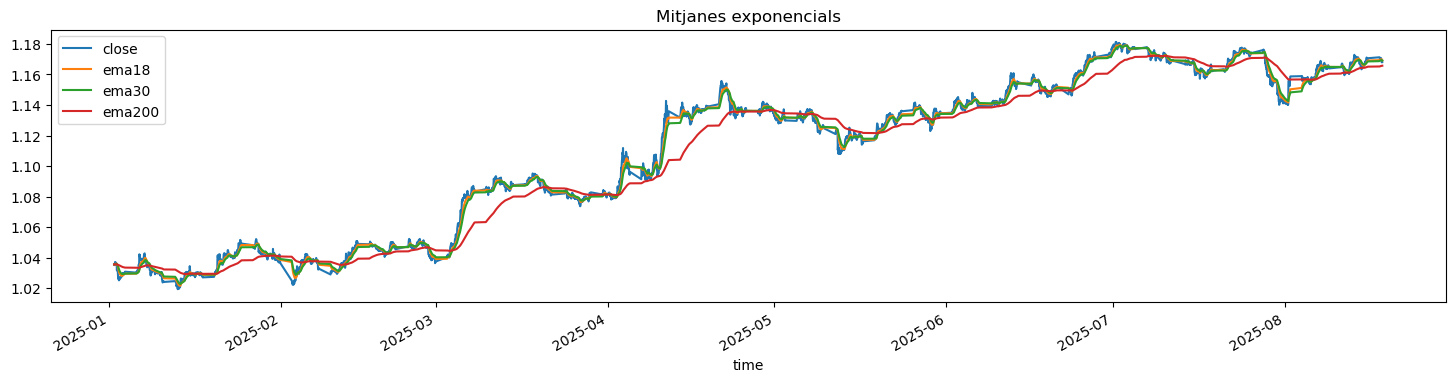

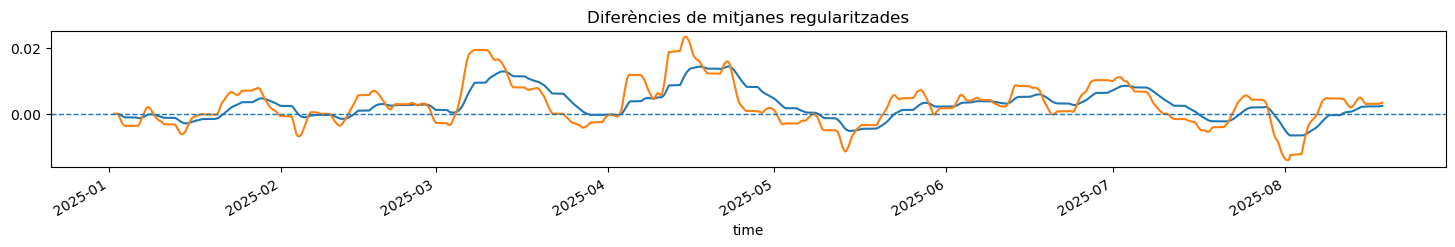

In [12]:
data.set_index("time")[['close', 'ema18', 'ema30', 'ema200']].plot(title="Mitjanes exponencials", figsize=(18,4))
plt.show()
data.set_index("time").diff_emas200.plot(title="Diferències de mitjanes regularitzades", figsize=(18,2))
data.set_index("time").diff_emas30.plot(title="Diferències de mitjanes regularitzades", figsize=(18,2))
plt.axhline(0, linestyle="--", linewidth=1)
plt.show()

### Desviació estàndard

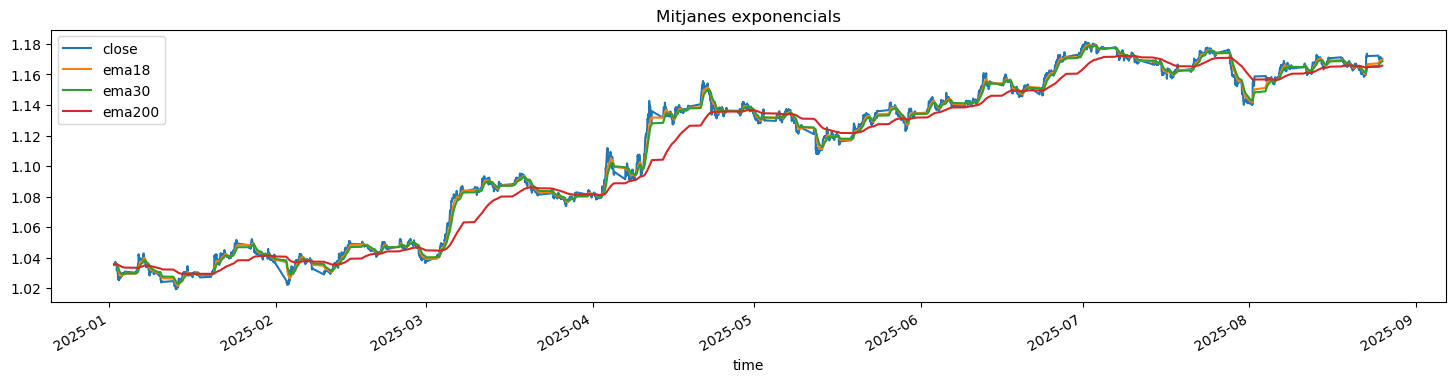

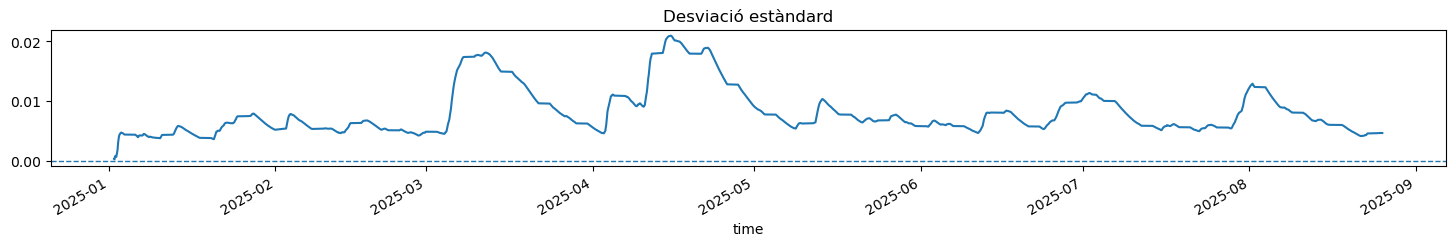

In [30]:
data.set_index("time")[['close', 'ema18', 'ema30', 'ema200']].plot(title="Mitjanes exponencials", figsize=(18,4))
plt.show()
data.set_index("time")["std"].plot(title="Desviació estàndard", figsize=(18,2))
plt.axhline(0, linestyle="--", linewidth=1)
plt.show()

### RSI

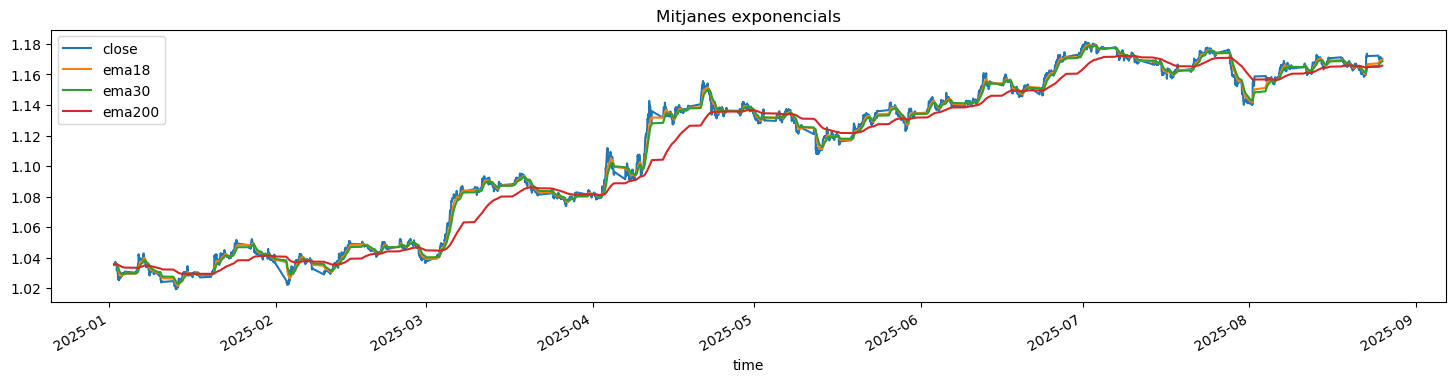

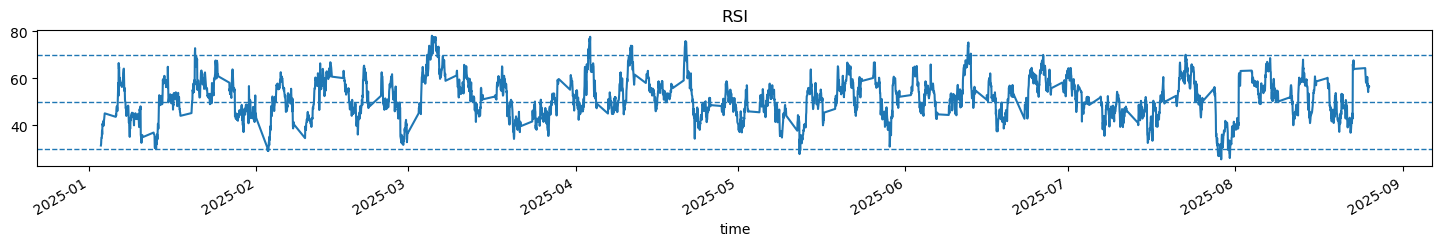

In [31]:
data.set_index("time")[['close', 'ema18', 'ema30', 'ema200']].plot(title="Mitjanes exponencials", figsize=(18,4))
plt.show()
data.set_index("time").rsi.plot(title="RSI", figsize=(18,2))
plt.axhline(70, linestyle="--", linewidth=1)
plt.axhline(50, linestyle="--", linewidth=1)
plt.axhline(30, linestyle="--", linewidth=1)
plt.show()
